PyTorch module	What does it do?



**torchvision** Contains datasets, model architectures and image transformations often used for computer vision problems.



**torchvision.datasets**	Here you'll find many example computer vision datasets for a range of problems from image classification, object detection, image captioning, video classification and more. It also contains a series of base classes for making custom datasets.



**torchvision.models**	This module contains well-performing and commonly used computer vision model architectures implemented in PyTorch, you can use these with your own problems.


**torchvision.transforms**	Often images need to be transformed (turned into numbers/processed/augmented) before being used with a model, common image transformations are found here.



**torch.utils.data.Dataset**	Base dataset class for PyTorch.



**torch.utils.data.DataLoader**	Creates a Python iterable over a dataset (created with torch.utils.data.Dataset).

In [1]:
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

## Import matplotlib for visualization
import matplotlib.pyplot as plt



## Check version
## NOTE : Your pytorch version shouldn't be lower than 1.10.0 and torchvision shouldnt be lower than 0

print(f"Pytorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

Pytorch version: 2.2.1+cu121
torchvision version: 0.17.1+cu121


PyTorch has a bunch of common computer vision datasets stored in torchvision.datasets.

Including FashionMNIST in torchvision.datasets.FashionMNIST().

To download it, we provide the following parameters:

**root: str -** which folder do you want to download
the data to?


**train: Bool -** do you want the training or test split?



**download: Bool -** should the data be downloaded?


**transform:** torchvision.transforms - what
transformations would you like to do on the data?


**target_transform -** you can transform the targets (labels) if you like too.


Many other datasets in torchvision have these parameter options.



In [2]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:01<00:00, 16071544.15it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 308240.37it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5394305.60it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 1069824.95it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
## see the first sample of training data

image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [4]:
image.shape

torch.Size([1, 28, 28])

In [5]:
len(train_data.data),len(train_data.targets),len(test_data.data),len(test_data.targets)

(60000, 60000, 10000, 10000)

In [6]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Image shape:torch.Size([1, 28, 28])


TypeError: Invalid shape (1, 28, 28) for image data

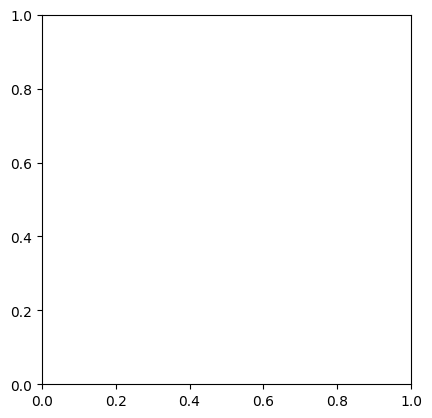

In [7]:
import matplotlib.pyplot as plt
image, label = train_data[9]
print(f"Image shape:{image.shape}")
plt.imshow(image)
plt.title(label);

Image shape:torch.Size([1, 28, 28])


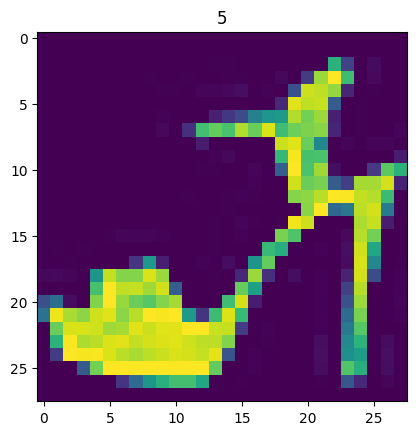

In [8]:
import matplotlib.pyplot as plt
image, label = train_data[9]
print(f"Image shape:{image.shape}")
plt.imshow(image.squeeze())  ### sequeez removes the extra dimension from [1,28,28]
plt.title(label);

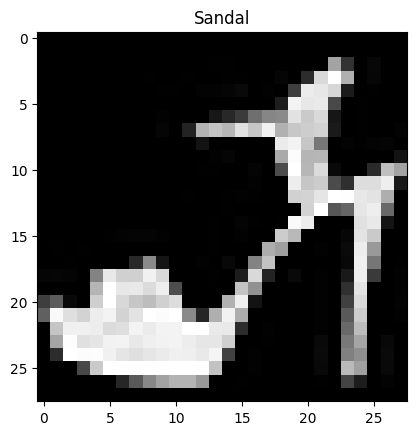

In [9]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);

In [10]:
torch.manual_seed(42)
fig  = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1,rows*cols+1):
  print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


<Figure size 900x900 with 0 Axes>

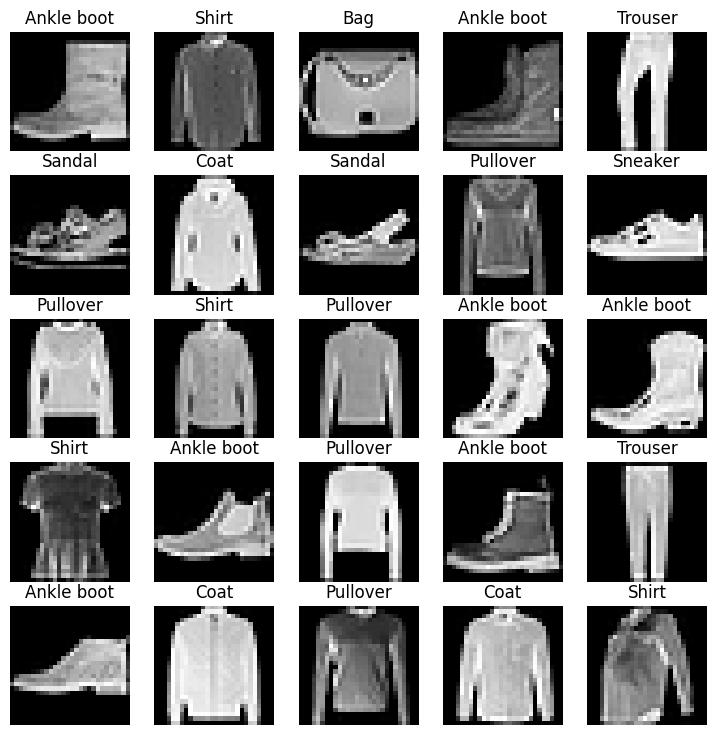

In [11]:

# Plot more images
torch.manual_seed(42)  #Setting the random seed in PyTorch:
fig = plt.figure(figsize=(9, 9))  #Creating a figure with Matplotlib:
rows, cols = 5, 5  #Defining the number of rows and columns for subplots:
for i in range(1, rows * cols + 1): #Looping through the subplots:
    random_idx = torch.randint(0, len(train_data), size=[1]).item()  #Selecting random data from the dataset:
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)  #Adding a subplot and displaying an image:
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);  ## Setting the title and removing the axis:

In [12]:
train_data,test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## Prepare DataLoader

Right now, our data is in the form of Pytorch datasets.

DataLoader turns our dataset into Python iterable.

More specifically, we want to turn our data into batches(or mini-batches).

Why would we do this?


1. It is more computationally efficient, as in, your computing hardware may not be able to look(store in memory) at 60000 images in one hit. So we break it down to 32 images at a time


2. It gives our neural network more chance to update its gradients per epochs.

In [13]:
from torch.utils.data import DataLoader


# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterable(batches)
train_dataloader = DataLoader(dataset = train_data,
                              batch_size = BATCH_SIZE,
                              shuffle = True)

## Doesent matter if we shuffle, because model havent seen it before
test_dataloader = DataLoader(dataset = test_data,
                             batch_size = BATCH_SIZE,
                             shuffle = False)

In [14]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7fa008c9c9a0>,
 <torch.utils.data.dataloader.DataLoader at 0x7fa008ce9f90>)

In [15]:
print(f"DataLoader: {train_dataloader,test_dataloader}")
print(f"Length of traun_datloader:{len(train_dataloader)} batches of {BATCH_SIZE}............")
print(f"Length of test_datloader:{len(test_dataloader)} batches of {BATCH_SIZE}............")

DataLoader: (<torch.utils.data.dataloader.DataLoader object at 0x7fa008c9c9a0>, <torch.utils.data.dataloader.DataLoader object at 0x7fa008ce9f90>)
Length of traun_datloader:1875 batches of 32............
Length of test_datloader:313 batches of 32............


60000/32 = 1875

10000/32 = 312.5


*This shows us how many images will be feeded per batch*

In [16]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 1, label size: torch.Size([])


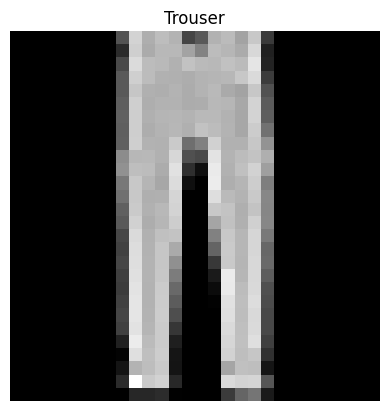

In [17]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

In [18]:
flatten_model = nn.Flatten()

x = train_features_batch[0]

output = flatten_model(x)

print(f"Shape before Flattening: {x.shape}")
print(f"Shape after Flattening:{output.shape}")


Shape before Flattening: torch.Size([1, 28, 28])
Shape after Flattening:torch.Size([1, 784])


In [19]:
len(output.squeeze())

784

28 * 28 = 284

In [20]:
from torch import nn

class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_unit:int,
               output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape,
                  out_features = hidden_unit),
        nn.Linear(in_features = hidden_unit,
                  out_features = output_shape)
    )

  def forward(self,x):
    return self.layer_stack(x)

In [21]:
torch.manual_seed(42)


#Setup model with input parameters

model_0 = FashionMNISTModelV0(
    input_shape = 784,
    hidden_unit = 30,
    output_shape = len(class_names)
).to("cpu")


model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=30, bias=True)
    (2): Linear(in_features=30, out_features=10, bias=True)
  )
)

In [22]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[ 0.3766,  0.0729, -0.2203,  0.1933,  0.0515,  0.1624, -0.1285,  0.1109,
         -0.0799,  0.1487]], grad_fn=<AddmmBackward0>)

In [23]:
model_0(dummy_x).shape

torch.Size([1, 10])

In [24]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [ 0.0087, -0.0248, -0.0097,  ...,  0.0131,  0.0158,  0.0225],
                      [-0.0352, -0.0171,  0.0060,  ...,  0.0230, -0.0191,  0.0352],
                      [-0.0023,  0.0071,  0.0330,  ...,  0.0164, -0.0095, -0.0053]])),
             ('layer_stack.1.bias',
              tensor([ 0.0167, -0.0324,  0.0086, -0.0326,  0.0153, -0.0116,  0.0118,  0.0138,
                       0.0014,  0.0044, -0.0131,  0.0012,  0.0206,  0.0294, -0.0100,  0.0083,
                       0.0086,  0.0143,  0.0123,  0.0119, -0.0259, -0.0061, -0.0178,  0.0296,
                      -0.0136,  0.0156,  0.0095,  0.0126,  0.0086, -0.0032])),
             ('layer_stack.2.we

## Setup  a loss , optimizer and evaluation metics

In [25]:
## Calculaye Accuracy (a classification metic)

# def accuracy_fn(y_true,y_pred):
#   correct = torch.eq(y_true,y_pred).sum().item()  # Torch.eq() calculate where two tensor are equal
#   acc = (correct/len(y_pred))*100
#   return acc

In [26]:
import requests
from pathlib import Path

## Download helper functions from Learn Pytorch repo

if Path("helper_function.py").is_file():
  print("Helper_function.py already exists, skipping download...")
else:
  print("Downloading helper functions")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("Helper_Function.py","wb") as f:
    f.write(request.content)

In [27]:
from Helper_Function import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.001)

In [28]:
## Creating a function to time our experiment

1. loop though epochs

2. Loop through training batches, perform training steps, calculate the loss per training batch

3. Loop though testing batches perform testing steps, calculate the test loss per batch

4. Print out whats happeing

5. Time it all.

In [29]:
from timeit import default_timer as timer
def print_train_time(start:float,end:float,device:torch.device=None):
  total_time = end-start
  print(f"Train time on{device}:{total_time:.3f} seconds")
  return total_time

In [31]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training times)
epochs = 3

# Create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulatively add up the loss per epoch

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_dataloader)

    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X)

            # 2. Calculate loss (accumatively)
            test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)

        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader)

    ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 1.13844 | Test loss: 1.00656, Test acc: 66.74%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.91579 | Test loss: 0.86745, Test acc: 70.22%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.81205 | Test loss: 0.79185, Test acc: 72.48%

Train time oncpu:37.566 seconds


In [32]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Make predictions with the model
            y_pred = model(X)

            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                                y_pred=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)

        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.7918464541435242,
 'model_acc': 72.48402555910543}